In [15]:
%matplotlib inline

import sys
sys.path.insert(0, "../")

import quantiacsToolbox as qt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils

In [16]:
stocks = utils.STOCKS_LIST
futures = utils.FUTURES_LIST

In [17]:
#utils.unzip_ticker_data()
stocks = ["AAPL", "AMZN"]
ticker_dict = utils.make_ticker_dict(data_subset=stocks)

In [18]:
df = utils.ticker_dict_to_df(ticker_dict)
df.head()

market        AAPL                                           AMZN           \
metric        OPEN    HIGH     LOW   CLOSE        VOL  p     OPEN     HIGH   
DATE                                                                         
2001-01-02  1.0670  1.0893  1.0446  1.0625  111984600  0  15.8125  15.8750   
2001-01-03  1.0357  1.1920  1.0313  1.1696  202321000  0  13.6250  17.8438   
2001-01-04  1.2946  1.3125  1.2054  1.2188  184361800  0  16.9375  17.5625   
2001-01-05  1.2098  1.2411  1.1473  1.1696  102219600  0  15.5000  15.8125   
2001-01-08  1.2098  1.2098  1.1384  1.1830   92568000  0  14.4375  15.5000   

market                                     
metric          LOW    CLOSE       VOL  p  
DATE                                       
2001-01-02  13.6250  13.8750   9181100  0  
2001-01-03  13.5625  17.5625  14578500  0  
2001-01-04  15.4375  15.5000  10599500  0  
2001-01-05  13.5625  14.5625   8756300  0  
2001-01-08  13.7500  14.9375   6892800  0

#### Method for doing more detailed slicing on multi-indexes

In [19]:
# idx = pd.IndexSlice
# df.loc[:, idx[:, "OPEN"]]

#### Slightly cleaner syntax with less flexibility

In [20]:
df_open = df.xs("OPEN", level="metric", axis=1)
df_vol = df.xs("VOL", level="metric", axis=1)
df_val = df_open*df_vol

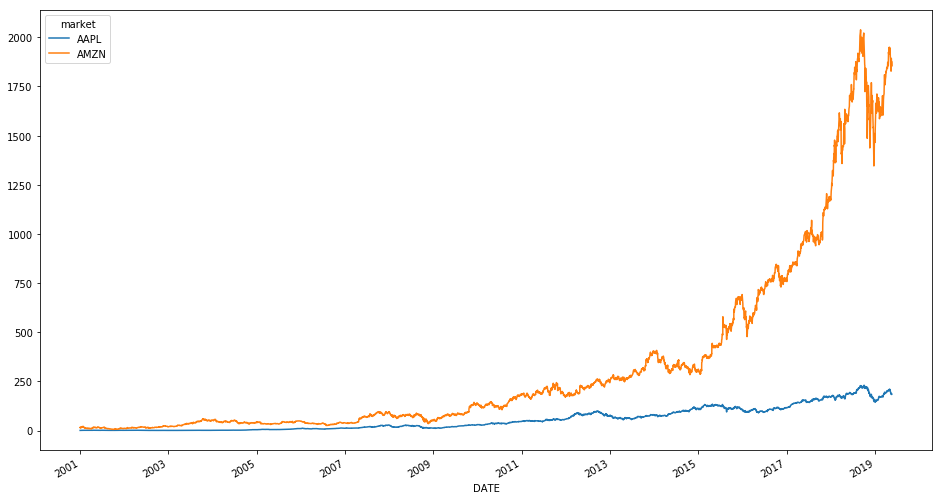

In [21]:
df_open.plot(figsize=(16, 9))

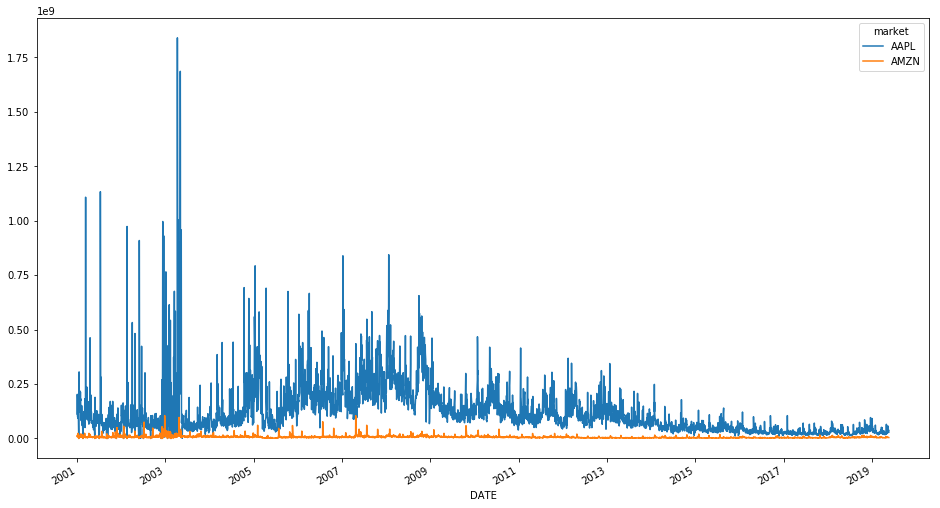

In [22]:
df_vol.plot(figsize=(16, 9))

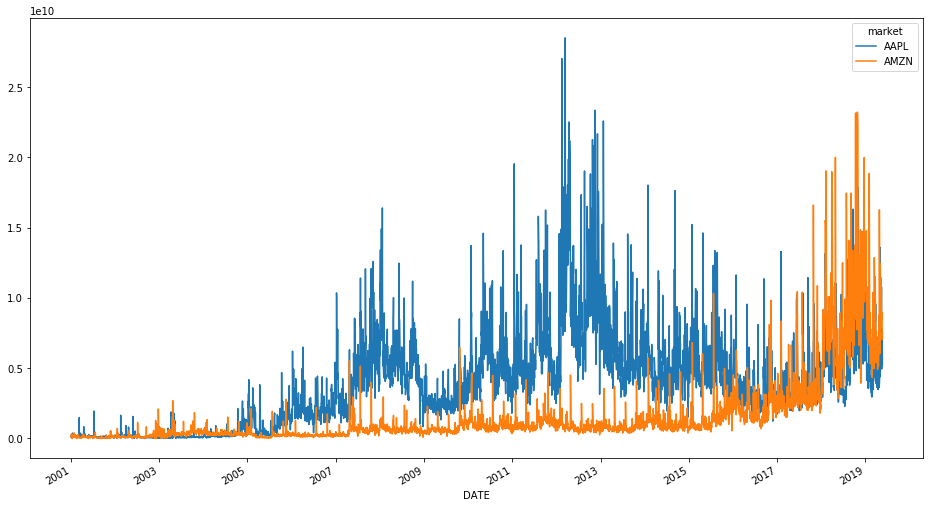

In [23]:
df_val.plot(figsize=(16, 9))

In [27]:
data = utils.ticker_dict_to_df(utils.make_ticker_dict())

In [28]:
data.shape

(10246, 3750)

In [31]:
data_open = data.xs("OPEN", level="metric", axis=1)
len(data_open.columns)

572

In [34]:
572*571

326612

#### Finding mutually uncorrelated variables

https://stats.stackexchange.com/questions/73125/find-k-of-n-items-with-least-pairwise-correlations

https://en.wikipedia.org/wiki/Multiple_correlation

#### Hacky, sub-optimal approach

In [47]:
uncor = (data_open.corr(method="kendall")**2).sum(axis=0).sort_values(ascending=True)

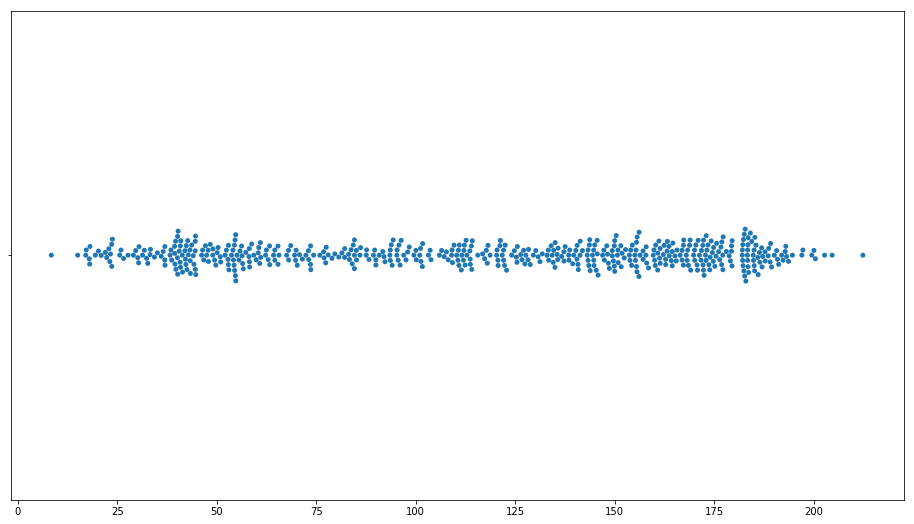

In [48]:
plt.figure(figsize=(16,9))
sns.swarmplot(uncor.sort_values(ascending=True))